In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
## importing the necessray libraries

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
data.pop('CLIENTNUM')
data.pop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
data.pop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

0        0.999910
1        0.999940
2        0.999980
3        0.999870
4        0.999980
           ...   
10122    0.999810
10123    0.004729
10124    0.002118
10125    0.003294
10126    0.003377
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, Length: 10127, dtype: float64

In [6]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
label = data['Gender'].value_counts().index
value = data['Gender'].value_counts().values

import plotly.graph_objects as go
plt.figure(figsize=(8,4))
go.Figure(go.Pie(
    name= "",
    values = value,
    labels = label,
    hovertemplate = "%{value} <br>%{label}"
))

<Figure size 576x288 with 0 Axes>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Gender', ylabel='count'>

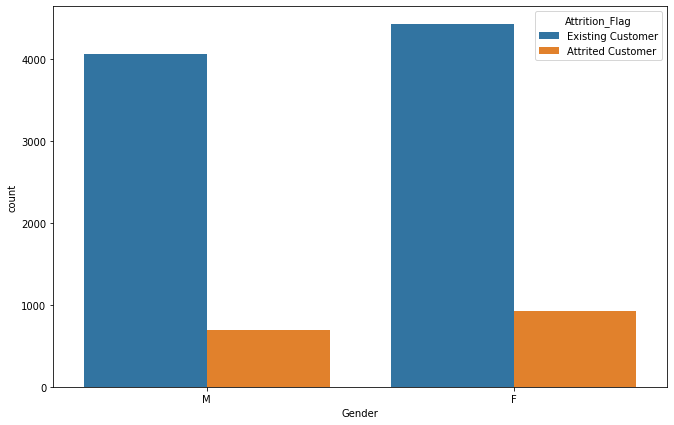

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(data['Gender'], hue=data['Attrition_Flag'])

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

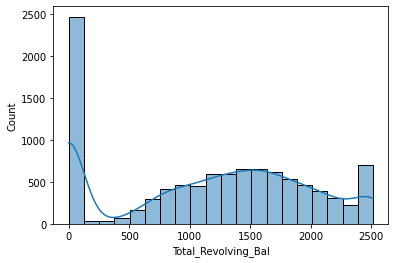

In [11]:
sns.histplot(data['Total_Revolving_Bal'], kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Card_Category', ylabel='count'>

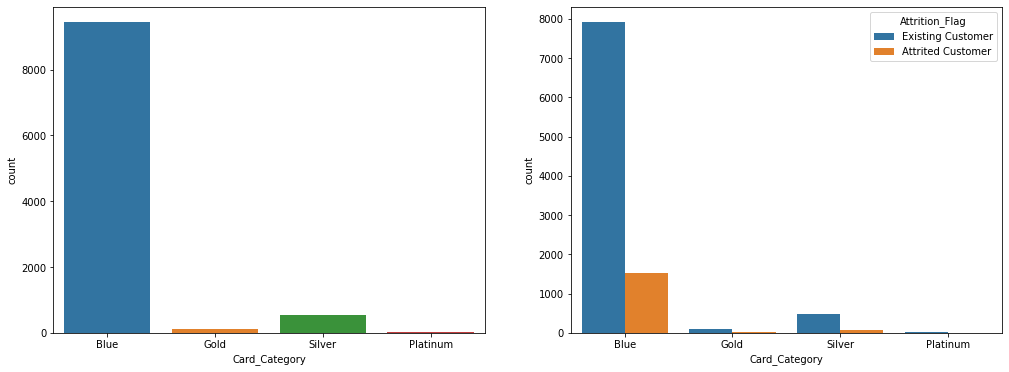

In [12]:
fig, axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.countplot(data['Card_Category'],ax=axes[0])
sns.countplot(data['Card_Category'], hue = data['Attrition_Flag'], ax=axes[1])

In [13]:
total = data.groupby('Card_Category')['Attrition_Flag'].count()
existing = data[data['Attrition_Flag'] == 'Existing Customer'].groupby('Card_Category')['Attrition_Flag'].count()
attrited = data[data['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Attrition_Flag'].count()

In [14]:
print('Percentage of Customers attrited that have blue cards ', attrited[0]/total[0])
print('Percentage of Customers attrited that have gold cards ', attrited[1]/total[1])
print('Percentage of Customers attrited that have platinum cards ', attrited[2]/total[2])
print('Percentage of Customers attrited that have silver cards ', attrited[3]/total[3])

## We see some minor variance in the percent but the percent of attrited customers is below 20%, so even a small change in these values may impact whether the customer stays or not

Percentage of Customers attrited that have blue cards  0.1609792284866469
Percentage of Customers attrited that have gold cards  0.1810344827586207
Percentage of Customers attrited that have platinum cards  0.25
Percentage of Customers attrited that have silver cards  0.14774774774774774


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Education_Level', ylabel='count'>

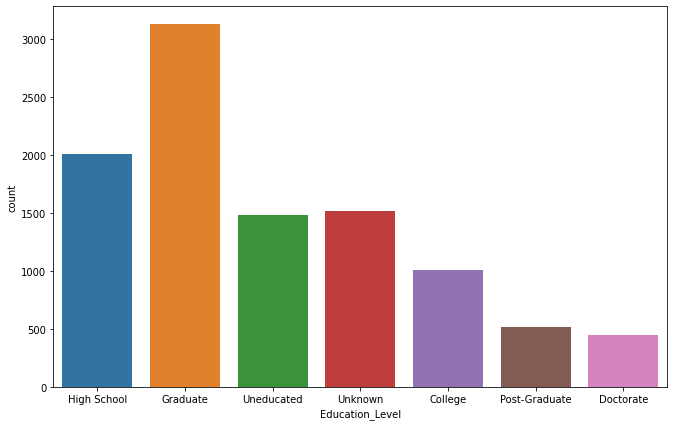

In [15]:
plt.figure(figsize=(11,7))
sns.countplot(data['Education_Level'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Education_Level', ylabel='count'>

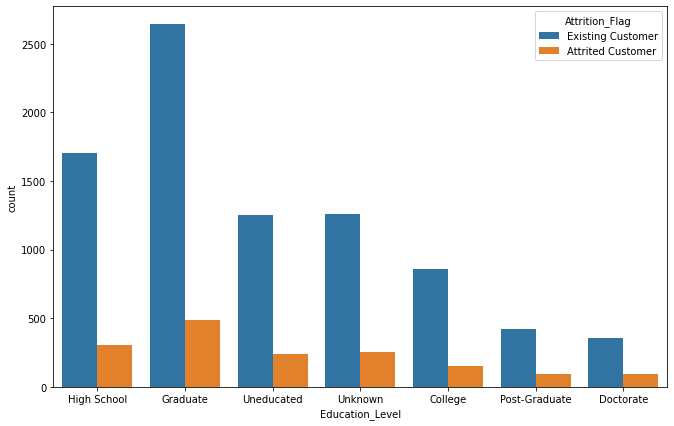

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(data['Education_Level'], hue=data['Attrition_Flag'])

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

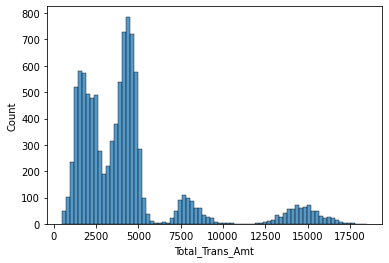

In [17]:
sns.histplot(data['Total_Trans_Amt'])

In [18]:
transaction_amt = []
for i in data['Total_Trans_Amt']:
  if i < 2500:
    transaction_amt.append('Less than 2500')
  elif i < 5000:
    transaction_amt.append('Less than 500')
  elif i < 12000:
    transaction_amt.append('Less than 12000')
  else:
    transaction_amt.append('12K +')

transaction_amt = np.array(transaction_amt)

In [19]:
data['Transaction_Category'] = transaction_amt

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Transaction_Category', ylabel='count'>

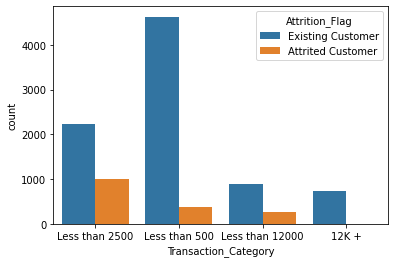

In [20]:
## Customers who transact more than 12K don't tend to leave the bank (credit card). The customers who have low transaction amount have high churn rate
sns.countplot(data['Transaction_Category'], hue=data['Attrition_Flag'])

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

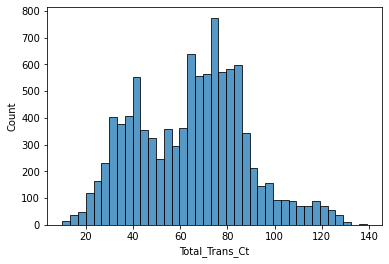

In [21]:
sns.histplot(data['Total_Trans_Ct'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

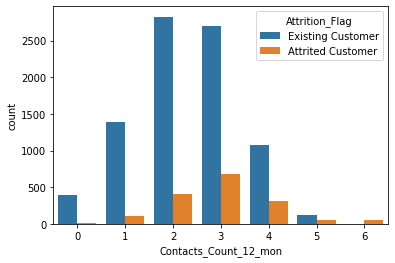

In [22]:
## We can see an interesting pattern in this plot. As the number of times the customer contacts the bank increases, the higher the chance that the customer will leave the bank
sns.countplot(data['Contacts_Count_12_mon'],hue=data['Attrition_Flag'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

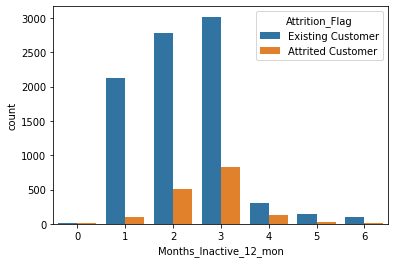

In [23]:
## We can see that if the customer is inactive for more than a month his chances of leaving are higher
sns.countplot(data['Months_Inactive_12_mon'], hue=data['Attrition_Flag'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

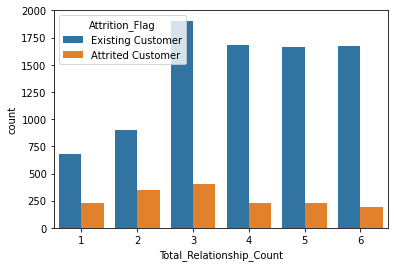

In [24]:
## As the total number of products held by the customer is high chances of them leaving the services becomes low
sns.countplot(data['Total_Relationship_Count'], hue=data['Attrition_Flag'])

In [25]:
data.pop('Transaction_Category')

0         Less than 2500
1         Less than 2500
2         Less than 2500
3         Less than 2500
4         Less than 2500
              ...       
10122              12K +
10123    Less than 12000
10124    Less than 12000
10125    Less than 12000
10126    Less than 12000
Name: Transaction_Category, Length: 10127, dtype: object

In [26]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

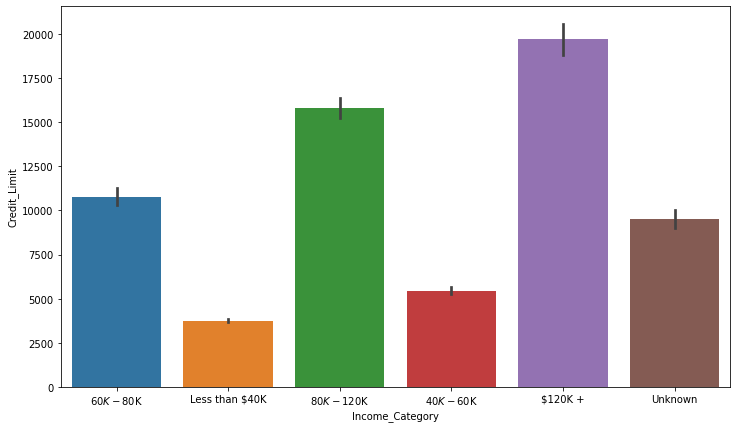

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(data['Income_Category'], data['Credit_Limit'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

Text(0.5, 1.0, '$120K +')

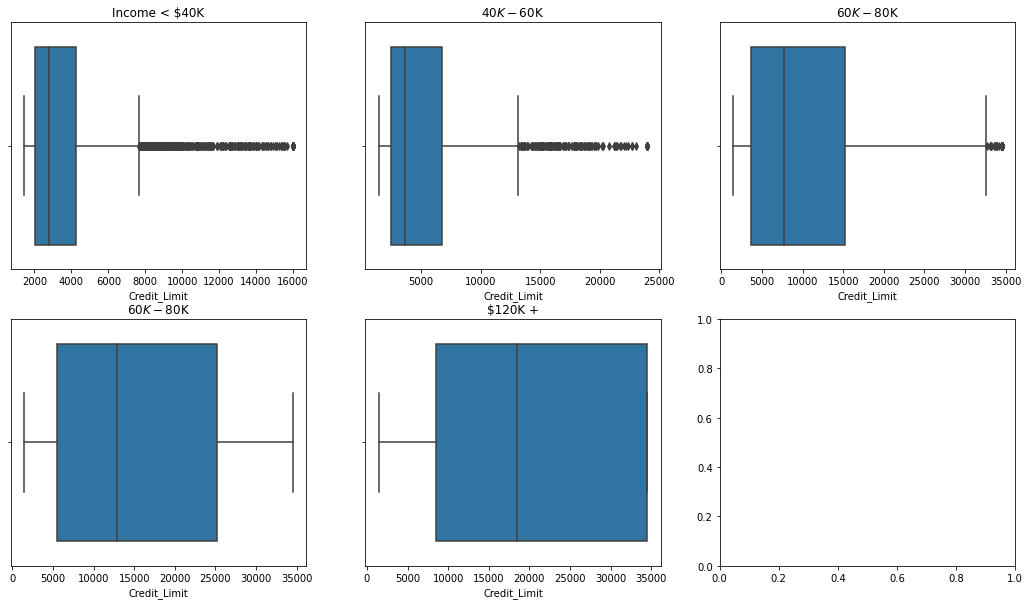

In [28]:
## We can see from the above plot that as the income increases customer tend to have higher credit limits. So from this insight we can populate the 'Income_Category' column where there are missing values
# Lets see how the Credit Limit is distributed among different Income categories
fig, axes = plt.subplots(2,3,figsize=(18,10))
sns.boxplot(data[data['Income_Category'] == 'Less than $40K']['Credit_Limit'], ax=axes[0,0])
axes[0,0].set_title('Income < $40K')
sns.boxplot(data[data['Income_Category'] == '$40K - $60K']['Credit_Limit'], ax=axes[0,1])
axes[0,1].set_title('$40K - $60K')
sns.boxplot(data[data['Income_Category'] == '$60K - $80K']['Credit_Limit'], ax=axes[0,2])
axes[0,2].set_title('$60K - $80K')
sns.boxplot(data[data['Income_Category'] == '$80K - $120K']['Credit_Limit'], ax=axes[1,0])
axes[1,0].set_title('$60K - $80K')
sns.boxplot(data[data['Income_Category'] == '$120K +']['Credit_Limit'], ax=axes[1,1])
axes[1,1].set_title('$120K +')

Text(0.5, 1.0, '$120K +')

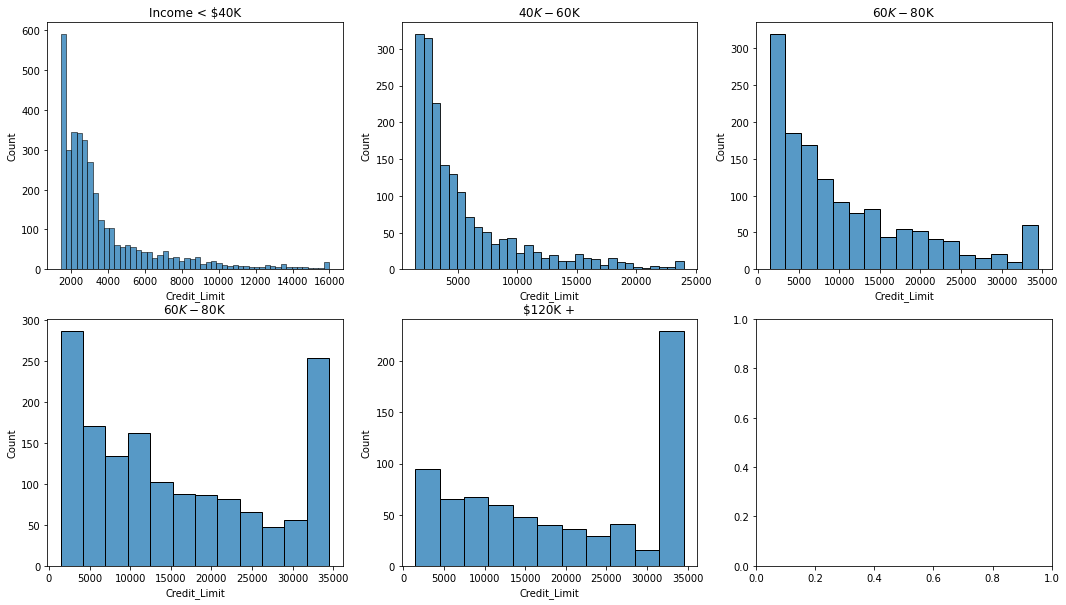

In [29]:
fig, axes = plt.subplots(2,3,figsize=(18,10))
sns.histplot(data[data['Income_Category'] == 'Less than $40K']['Credit_Limit'], ax=axes[0,0])
axes[0,0].set_title('Income < $40K')
sns.histplot(data[data['Income_Category'] == '$40K - $60K']['Credit_Limit'], ax=axes[0,1])
axes[0,1].set_title('$40K - $60K')
sns.histplot(data[data['Income_Category'] == '$60K - $80K']['Credit_Limit'], ax=axes[0,2])
axes[0,2].set_title('$60K - $80K')
sns.histplot(data[data['Income_Category'] == '$80K - $120K']['Credit_Limit'], ax=axes[1,0])
axes[1,0].set_title('$60K - $80K')
sns.histplot(data[data['Income_Category'] == '$120K +']['Credit_Limit'], ax=axes[1,1])
axes[1,1].set_title('$120K +')

In [30]:
## There are outliers for some plots, so we'll take median as our reference to fill the unknown values in income category
data.groupby('Income_Category')['Credit_Limit'].median()

Income_Category
$120K +           18442.0
$40K - $60K        3682.0
$60K - $80K        7660.0
$80K - $120K      12830.0
Less than $40K     2766.0
Unknown            6380.0
Name: Credit_Limit, dtype: float64

In [31]:
income = []
for i,j in zip(data['Credit_Limit'], data['Income_Category']):
  if j == 'Unknown':
    if i < 2766:
      income.append('Less than $40K')
    elif i < 3682:
      income.append('$40K - $60K')
    elif i < 7660:
      income.append('$60K - $80K')
    elif i < 12830:
      income.append('$80K - $120K')
    else:
      income.append('$120K +')
  else:
    income.append(j)


income = np.array(income)
data['Income_Category'] = income


data['Income_Category'].value_counts()

Less than $40K    3780
$40K - $60K       1920
$80K - $120K      1753
$60K - $80K       1680
$120K +            994
Name: Income_Category, dtype: int64

In [32]:
contingency = pd.crosstab(index=data['Education_Level'], columns=data['Income_Category'])
print(contingency)

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Education_Level                                                    
College               90          193          165           196   
Doctorate             53           74           80            70   
Graduate             281          590          502           551   
High School          202          379          363           361   
Post-Graduate         47          117           89            85   
Uneducated           163          279          238           246   
Unknown              158          288          243           244   

Income_Category  Less than $40K  
Education_Level                  
College                     369  
Doctorate                   174  
Graduate                   1204  
High School                 708  
Post-Graduate               178  
Uneducated                  561  
Unknown                     586  


In [33]:
(chi2, p, dof,_) = stats.chi2_contingency([contingency.iloc[0].values,contingency.iloc[1].values])
print(chi2, p)

7.121527968030152 0.12960371450535793


In [34]:
data.groupby('Education_Level')['Total_Trans_Amt'].mean()

Education_Level
College          4255.806515
Doctorate        4193.015521
Graduate         4418.491368
High School      4403.740189
Post-Graduate    4515.414729
Uneducated       4484.340955
Unknown          4420.053325
Name: Total_Trans_Amt, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Education_Level', ylabel='count'>

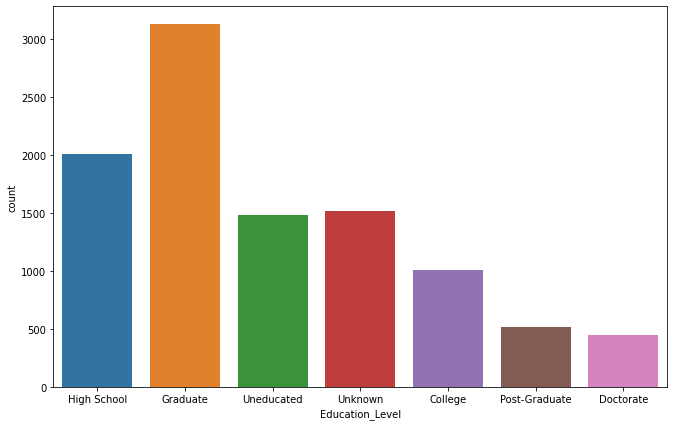

In [35]:
plt.figure(figsize=(11,7))
sns.countplot(data['Education_Level'])

In [36]:
education_mapper = {'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6} 
income_mapper = {'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4}
card_mapper = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}

data['Education_Level'] = data['Education_Level'].replace(education_mapper)
data['Income_Category'] = data['Income_Category'].replace(income_mapper)
data['Card_Category'] = data['Card_Category'].replace(card_mapper)

In [37]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
x = np.array(x)
y = np.array(y)

In [38]:
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])

In [39]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])], remainder='passthrough')
x = ct.fit_transform(x)

In [40]:
y = le.fit_transform(y)

In [41]:
x_train, x_test,  y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y)

In [42]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
ypred_log = lr.predict(x_test)
cm = confusion_matrix(y_test, ypred_log)
print(cm)
accuracy_score(y_test, ypred_log)

[[ 183  142]
 [  57 1644]]


0.9017769002961501

In [45]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
ypred_rfc = rfc.predict(x_test)
cm_rfc = confusion_matrix(y_test, ypred_rfc)
print(cm_rfc)
print(accuracy_score(y_test, ypred_rfc))

[[ 264   61]
 [  26 1675]]
0.9570582428430404
